<bound method NDFrame.head of       cementcomp   slag  flyash  water  superplastisizer  coraseaggr  \
0          540.0    0.0     0.0  162.0               2.5      1040.0   
1          540.0    0.0     0.0  162.0               2.5      1055.0   
2          332.5  142.5     0.0  228.0               0.0       932.0   
3          332.5  142.5     0.0  228.0               0.0       932.0   
4          198.6  132.4     0.0  192.0               0.0       978.4   
...          ...    ...     ...    ...               ...         ...   
1025       276.4  116.0    90.3  179.6               8.9       870.1   
1026       322.2    0.0   115.6  196.0              10.4       817.9   
1027       148.5  139.4   108.6  192.7               6.1       892.4   
1028       159.1  186.7     0.0  175.6              11.3       989.6   
1029       260.9  100.5    78.3  200.6               8.6       864.5   

      finraggr  age    CCS  
0        676.0   28  79.99  
1        676.0   28  61.89  
2        594.0  27

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

AxesSubplot(0.547727,0.125;0.281818x0.16413)
trainx=(721, 8) , trainY = (721,)
testX=(309, 8) , testY = (309,)


C:\Users\YASHPU~1\AppData\Local\Temp/ipykernel_2184/1954035146.py:128: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainx,testx,trainY,testY = train_test_split(data.drop(Y,1),data[Y],test_size=0.3)


                                 OLS Regression Results                                
Dep. Variable:                    CCS   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1226.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):                        0.00
Time:                        22:35:00   Log-Likelihood:                         -2690.3
No. Observations:                 721   AIC:                                      5397.
Df Residuals:                     713   BIC:                                      5433.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

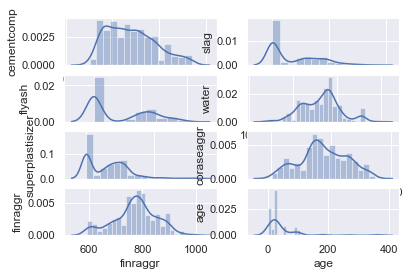

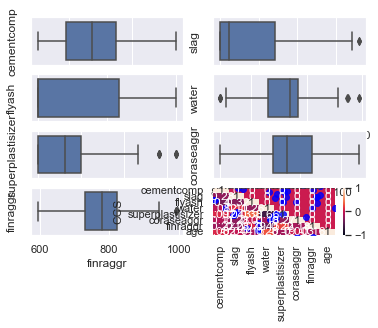

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct  1 09:13:37 2022

@author: Yash Pungaliya
"""

#Singualrity :- the column which have 85% or more same value do not  predictive values
#Steps in EDA : 1)Correlation 2)Outliers using Boxplot 3)Normalization check using histogram 4)Checking and fixing null values
#Linear Regression
#Dataset : - Concrete 

#import libraries
import pandas as pd 
import numpy as np 
import statsmodels.api as sm  #OLS model
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats  as stats
from sklearn.model_selection import train_test_split
import statsmodels.stats.api as sms #heteroscedasticity check
import pylab#plot to check hetero or homo scedasticiity 
from sklearn import preprocessing # data transformation
from sklearn.metrics import mean_squared_error

#read data
filename = "concrete.csv"
conc = pd.read_csv(filename)
print (conc.head)

conc.shape
conc.columns
conc.rename(columns={'cementcomp':'ccomp',
                     'superplastisizer':'super',
                     'coraseaggr': 'caggr',
                     'finraggr':'faggr'})

conc.isnull().sum()
conc[conc==0].count()

#summary of the data
conc.describe()

#check for outliers in age
conc.age.describe()

#extract 'Y' variable from 
Y = "CCS"
features = list(conc.columns)
features.remove(Y)
features


#function to check normality 
#input : numeric data
#O/p : returns statsu of each cilumn as Normal or not Normal 
#test: Shapiro/Agustion Test

def checkNormality(data,col):
    shapiro = []
    agistino = []
    
    for c in col:
        tstat,pval = stats.shapiro(data[c])
        if pval < 0.05:
            shapiro.append('Not Normal')
        else:
            shapiro.append('Normal')

    for c in col:
        tstat,pval = stats.normaltest(data[c])
        if pval < 0.05:
            agistino.append('Not Normal')
        else:
            agistino.append('Normal')
            
   
    nd=pd.DataFrame({'features':col,
                             'shapiro':shapiro,
                             'agistino':agistino})
    return(nd)

checkNormality(conc, features)
# =============================================================================
# conc.shape
# features
# =============================================================================

#b:boxplot h:histogram  hm = heatmap 
def plotCharts(data,nc,ctype):
    if ctype in ['b','h','hm']:
        
        #histogram /boxplot
        if ctype in ['h','b']:
            ROWS = int(np.ceil(len(nc)/2))
            COLS = 2
            POS = 1
            
            #set the font scale and outer figures
            sns.set(font_scale =1 ,color_codes = True)
            fig = plt.figure()
            
            for c in nc:
                fig.add_subplot(ROWS,COLS,POS)
                if(ctype=="h"):
                    sns.distplot(data[c]).set_ylabel(c)
                else:
                    sns.boxplot(data[c]).set_ylabel(c)
                POS+=1
        else:
            #heatmap
            cor = data[nc].corr()
            cor = np.tril(cor) #Fill the upper triangle matrix with 0
            print(sns.heatmap(cor, xticklabels = nc, yticklabels=nc,
                        annot=True,vmin =-1,vmax=1))
    else:
        print('Invalid Chart type'+ctype)
        
# Plot Individual Charts         
plotCharts(conc, features, "h")
plotCharts(conc, features, "b")
plotCharts(conc, features, "hm")



#Slipt the Data
def splitData(data,Y,perc=0.3):
    trainx,testx,trainY,testY = train_test_split(data.drop(Y,1),data[Y],test_size=0.3)
    
    return(trainx,testx,trainY,testY )

trainx,testx,trainY,testY  = splitData(conc, Y)
print("trainx={} , trainY = {}".format(trainx.shape,trainY.shape))
print("testX={} , testY = {}".format(testx.shape,testY.shape))

#Build Model 
def buildModel(trainx,trainy):
    model = sm.OLS(trainY,trainx).fit()
    print(model.summary())
    return(model)

#Model 1 
m1 = buildModel(trainx, trainY)     

#validate the assumptions of linear regression
#1)mean of residuals is 0
np.mean(m1.resid)   


def checkHeteroscedasticity(model,trainY):
    
    sns.set(style="whitegrid")
    sns.residplot(x=m1.resid,y=trainY,lowess= True ,color = 'blue')
    
    #Breusch Pagan Test 
    pvalue = sms.het_breuschpagan(m1.resid,m1.model.exog)[1]
    if pvalue <0.05:
        return("Model is Heteroscedastic")
    else:
        return("Model is Homoscedastic")


checkHeteroscedasticity(m1, trainY)

#Prediction 
def prediction(model,testx,testY):
    pred = round(model.predict(testx),2)
    
    
    #Store Actual and predicted data for  analysis
    df = pd.DataFrame({'actual':testY ,'predicted':pred})
    df['err']=df.actual-df.predicted
    
    #MSE 
    mse=mean_squared_error(testY, pred)
    return(df,mse)
res1,mse1 = prediction(m1,testx,testY)

print("Model 1 mse ={}" .format(mse1))

print(mse1)


AxesSubplot(0.125,0.125;0.62x0.755)


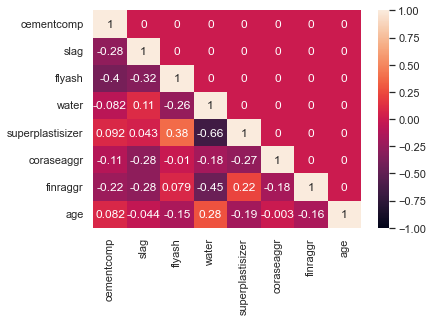

In [3]:
plotCharts(conc, features, "hm")